## __Coursera Capstone__

El objetivo de este repositorio es fungir como una muestra de lo desarrollado dentro del certificado de Coursera: 

__"IBM Data Science Certificado profesional"__ 

El cual esta enfocado en el desarrollo de habilidades básicas para la implementación, desarrollo y evaluación de proyectos de Ciencia de Datos

In [59]:
import warnings
warnings.simplefilter(action='ignore')

In [60]:
# Importación de modulos
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# Loading Data
data = pd.read_csv("datasets/Data-Collisions.csv")
y = data["SEVERITYCODE"]
x = data.loc[:, data.columns != 'SEVERITYCODE']

In [62]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [64]:
for i in data.columns: 
    print(data[i].iloc[0], i)

2 SEVERITYCODE
-122.32314840000002 X
47.70314032 Y
1 OBJECTID
1307 INCKEY
1307 COLDETKEY
3502005 REPORTNO
Matched STATUS
Intersection ADDRTYPE
37475.0 INTKEY
5TH AVE NE AND NE 103RD ST LOCATION
  EXCEPTRSNCODE
nan EXCEPTRSNDESC
2 SEVERITYCODE.1
Injury Collision SEVERITYDESC
Angles COLLISIONTYPE
2 PERSONCOUNT
0 PEDCOUNT
0 PEDCYLCOUNT
2 VEHCOUNT
2013/03/27 00:00:00+00 INCDATE
3/27/2013 2:54:00 PM INCDTTM
At Intersection (intersection related) JUNCTIONTYPE
11 SDOT_COLCODE
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE SDOT_COLDESC
nan INATTENTIONIND
N UNDERINFL
Overcast WEATHER
Wet ROADCOND
Daylight LIGHTCOND
nan PEDROWNOTGRNT
nan SDOTCOLNUM
nan SPEEDING
10 ST_COLCODE
Entering at angle ST_COLDESC
0 SEGLANEKEY
0 CROSSWALKKEY
N HITPARKEDCAR


### Data Engineering

In [53]:
# Convert Categorical Variables: 
weather = pd.get_dummies(data.WEATHER)
col_des = pd.get_dummies(data.SDOT_COLCODE)
data= pd.concat([data, weather], axis = 1)
data= pd.concat([data, col_des], axis = 1)

In [57]:
for i in data.columns: 
    print(data[i].iloc[0], i)

2 SEVERITYCODE
-122.32314840000002 X
47.70314032 Y
1 OBJECTID
1307 INCKEY
1307 COLDETKEY
3502005 REPORTNO
Matched STATUS
Intersection ADDRTYPE
37475.0 INTKEY
5TH AVE NE AND NE 103RD ST LOCATION
  EXCEPTRSNCODE
nan EXCEPTRSNDESC
2 SEVERITYCODE.1
Injury Collision SEVERITYDESC
Angles COLLISIONTYPE
2 PERSONCOUNT
0 PEDCOUNT
0 PEDCYLCOUNT
2 VEHCOUNT
2013/03/27 00:00:00+00 INCDATE
3/27/2013 2:54:00 PM INCDTTM
At Intersection (intersection related) JUNCTIONTYPE
11 SDOT_COLCODE
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE SDOT_COLDESC
nan INATTENTIONIND
N UNDERINFL
Overcast WEATHER
Wet ROADCOND
Daylight LIGHTCOND
nan PEDROWNOTGRNT
nan SDOTCOLNUM
nan SPEEDING
10 ST_COLCODE
Entering at angle ST_COLDESC
0 SEGLANEKEY
0 CROSSWALKKEY
N HITPARKEDCAR
0 Blowing Sand/Dirt
0 Clear
0 Fog/Smog/Smoke
0 Other
1 Overcast
0 Partly Cloudy
0 Raining
0 Severe Crosswind
0 Sleet/Hail/Freezing Rain
0 Snowing
0 Unknown
0 0
1 11
0 12
0 13
0 14
0 15
0 16
0 18
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 31
0

<AxesSubplot:xlabel='X', ylabel='Y'>

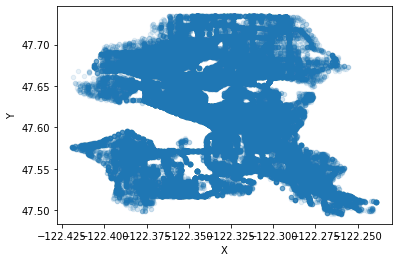

In [51]:
data.plot(kind = "scatter", x = "X", y  = "Y", alpha  = 0.1)

In [52]:
numerical_variables = [
    "PERSONCOUNT",  # ENtre mas personas tenga una colisión, es mucho mas probable que termine teniendo desenlace fatal
    "VEHCOUNT", # Número de Vehiculos inmiscuidos en una colisión. La hipótesis menciona que entre mas autos mayor es la fatalidad. 
    "PEDCOUNT", # Número de Peatones
]